#Tarea metodos computacionales

**Estudiante:** Dayana Andrea Henao Arbeláez

**Cédula:** 1001469185






# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [2583]:
import numpy as np
import pandas as pd 
import matplotlib.pylab as plt
from scipy import optimize
from scipy.interpolate import lagrange


Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

**Definición de las funciones**

In [2584]:
#Posicion en x
def pos_x(t, theta, v0, u, alpha, g, b):  
  T1 =  (u * np.cos(alpha))*t
  T2 =  (1./b)*(v0*np.cos(theta) - u*np.cos(alpha))
  T3 =  1-np.exp(-b*t)
  x = T1 + T2 * T3   
  return x

#Posicion en y
def pos_y(t,theta,v0, u, alpha, g, b):  
  T1 = (1/b) * (g/b + v0 * np.sin(theta) - u*np.sin(alpha))
  T2 =  1-np.exp(-b * t)
  T3 =  (g/b - u * np.sin(alpha))*t
  y = T1*T2 - T3 
  return y 


In [2585]:
# Parámetros iniciales

v0 = 60                #Velocidad en m/s
alpha = np.pi          #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2               #rapidez del viento
b = 0.05               #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

**Construcción del diccionario y del DataFrame**

In [2586]:
params = theta, v0 , u, alpha,  g, b
t = np.linspace(0, 30, 1000)

x = pos_x(t, *params)
y = pos_y(t, *params)
df = pd.DataFrame({"x":x, "y":y,"t":t})

In [2587]:
df

,x,y,t
0,0.000000,0.000000,0.00000
1,1.272434,1.268694,0.03003
2,2.541608,2.526653,0.06006
3,3.807525,3.773893,0.09009
4,5.070192,5.010432,0.12012
...,...,...,...
995,226.974382,-2158.340400,29.87988
996,226.561339,-2162.620267,29.90991
997,226.147564,-2166.902543,29.93994
998,225.733058,-2171.187225,29.96997


**Gráficos**

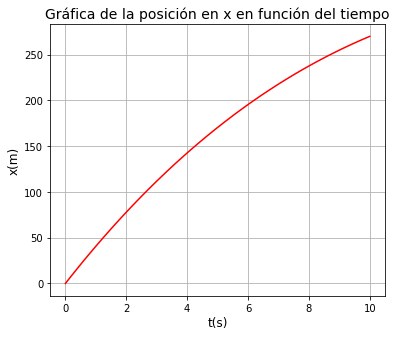

In [2588]:
#Gráfica de la posición en x con respecto a tiempo
T=np.linspace(0,10,100)
plt.figure(figsize=(6,5))
plt.plot(T,pos_x(T,theta,v0,u,alpha,g,b), color='red')
plt.title('Gráfica de la posición en x en función del tiempo', fontsize=14)
plt.xlabel('t(s)', fontsize=12)
plt.ylabel('x(m)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

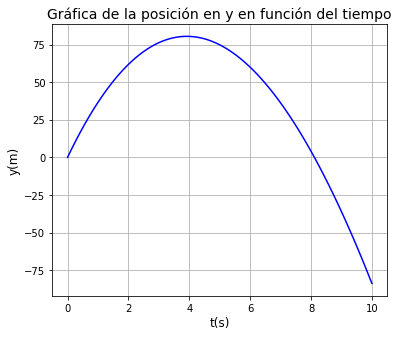

In [2589]:
T=np.linspace(0,10,100)
plt.figure(figsize=(6,5))
plt.plot(T,pos_y(T,theta,v0,u,alpha,g,b), color='blue')
plt.title('Gráfica de la posición en y en función del tiempo', fontsize=14)
plt.xlabel('t(s)', fontsize=12)
plt.ylabel('y(m)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid()

**Alcance máximo de la partícula**

El alcance máximo que tiene la pelota se calcula encontrando el tiempo de vuelo total que es el tiempo en el que la pelota toca el suelo, es decir, cuando y=0. 

In [2590]:
#Posicion en y
def tv(t):  
  return ((1/b) * (g/b + v0 * np.sin(theta) - u*np.sin(alpha))*(1-np.exp(-b * t)))-((g/b - u * np.sin(alpha))*t)

In [2591]:
Tv=optimize.newton(tv,7)

In [2592]:
print(f'El tiempo de vuelo de la partícula es {Tv}')

El tiempo de vuelo de la partícula es 8.111627022095591


El alcance máximo viene dado por:

In [2593]:
pos_x(Tv, theta, v0, u, alpha, g, b)

In [2594]:
print(f'El alcance máximo de la partícula es {pos_x(Tv, theta, v0, u, alpha, g, b)}')

El alcance máximo de la partícula es 239.60614945520737


In [2595]:
tiempo = optimize.newton(pos_y, 10, args=(params))

Text(0, 0.5, 'y')

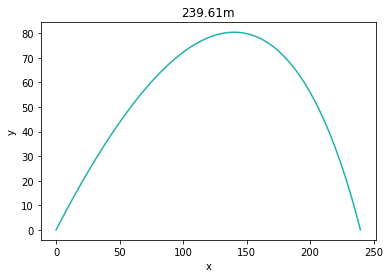

In [2596]:
tiempo
tv = np.linspace(0, tiempo, 100)
plt.plot(pos_x(tv, *params),pos_y(tv, *params), color='lightseagreen')
plt.title(f"{pos_x(tiempo, *params):.2f}m")
plt.xlabel("x")
plt.ylabel("y")

**Gráfica del alcance máximo en función del ángulo θ**



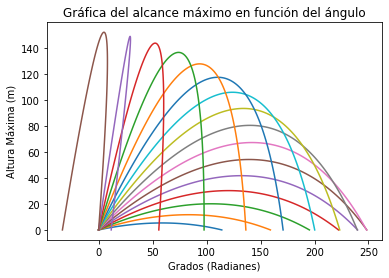

In [2597]:
theta_ = np.arange(10,90,5)
theta = np.deg2rad(theta_)

R = np.zeros(len(theta))
tv = np.zeros(len(theta))

for i,t in enumerate(theta):
  params = t, v0 , u, alpha,  g, b
  
  tiempo = optimize.newton(pos_y, 10, args=(params))
  tv[i] = tiempo
  R[i] = pos_x(tiempo,*params)

  t = np.linspace(0,tiempo,100)  
  plt.plot(pos_x(t, *params), pos_y(t, *params))
  plt.xlabel('Grados (Radianes)')
  plt.ylabel('Altura Máxima (m)')
  plt.title('Gráfica del alcance máximo en función del ángulo')

**Interpolación del alcance máximo (R) como función de theta (θ)**

In [2598]:
P=lagrange(theta_,R)
print(P)

            15             14             13             12
-1.988e-30 x  + 1.867e-27 x  - 8.223e-25 x  + 2.246e-22 x 
              11             10             9             8
 - 4.083e-20 x  + 4.783e-18 x  - 2.272e-16 x - 3.756e-14 x
              7             6             5             4            3
 + 9.728e-12 x - 9.402e-10 x - 2.371e-08 x + 2.178e-05 x - 0.001791 x
           2
 - 0.1256 x + 12.82 x + 1.323e-07


In [2599]:
from scipy.interpolate import CubicSpline
p=CubicSpline(theta_,R)
print(p)

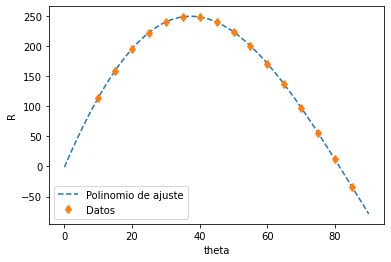

In [2600]:
x=np.linspace(0,90,150)
plt.plot(x,p(x),'--', label='Polinomio de ajuste')
plt.plot(theta_, R,"d", label='Datos')
plt.xlabel("theta")
plt.ylabel("R")
plt.legend()




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


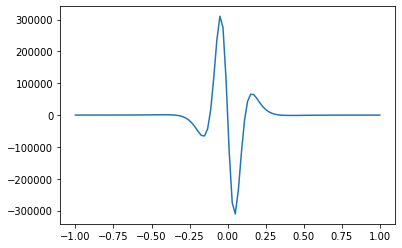

In [2601]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_) )
plt.show()

In [2602]:
def f(x):
  return 1/(1+25*x**2)

In [2603]:
def p(n):
  Y=[]
  X=np.linspace(-1,1,n)

  for i in X:
    Y.append(f(i))

  P1=lagrange(X,Y)

  x=np.linspace(-2.5,2.5,50)
  print(f'Polinomio de ajuste para {n} puntos:')
  print(P1) 
  
  plt.plot(x,P1(x), color='darkcyan', label='Polinomio de ajuste',linewidth=2)  
  plt.plot(X,f(X),'r.', label='Datos')
  plt.xlabel('x', fontsize=13)
  plt.ylabel('P(x)', fontsize=13)
  plt.title('Gráfica del polinomio de Lagrange', fontsize=14)
  plt.legend()
  plt.grid()
  return plt.figure()

Polinomio de ajuste para 4 puntos:
           3          2
1.735e-17 x - 0.2545 x - 6.072e-18 x + 0.293


<Figure size 432x288 with 0 Axes>

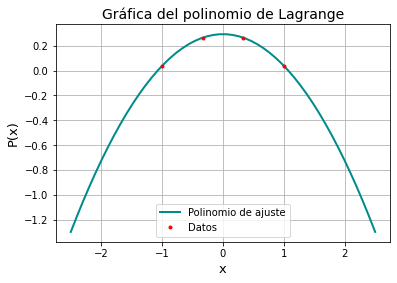

<Figure size 432x288 with 0 Axes>

In [2604]:
p(4)

Polinomio de ajuste para 8 puntos:
           7         6             5         4             3         2
-1.32e-14 x - 5.174 x + 4.229e-14 x + 9.076 x + 7.166e-15 x - 4.617 x + 3.161e-16 x + 0.7526


<Figure size 432x288 with 0 Axes>

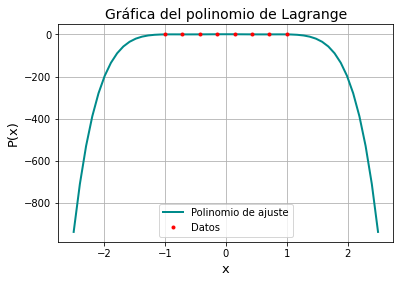

<Figure size 432x288 with 0 Axes>

In [2605]:
p(8)

Polinomio de ajuste para 12 puntos:
            11        10             9         8             7
-1.464e-13 x  - 89.5 x  + 1.527e-12 x + 215.1 x - 7.305e-12 x
          6             5         4             3         2
 - 184.3 x - 2.488e-12 x + 69.76 x - 2.039e-14 x - 11.96 x - 2.438e-15 x + 0.923


<Figure size 432x288 with 0 Axes>

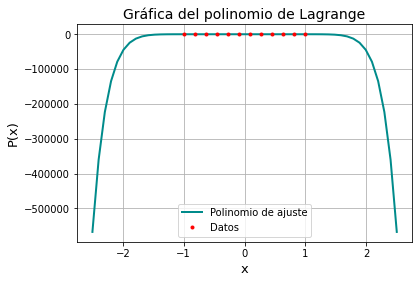

<Figure size 432x288 with 0 Axes>

In [2606]:
p(12)

Polinomio de ajuste para 16 puntos:
           15        14             13        12             11
1.276e-12 x  - 1519 x  - 3.981e-10 x  + 4651 x  - 1.342e-10 x 
         10             9        8            7        6             5
 - 5570 x  + 5.346e-10 x + 3348 x + 1.49e-10 x - 1083 x + 1.625e-11 x
          4             3         2
 + 190.1 x + 1.167e-13 x - 17.98 x - 1.233e-15 x + 0.9762


<Figure size 432x288 with 0 Axes>

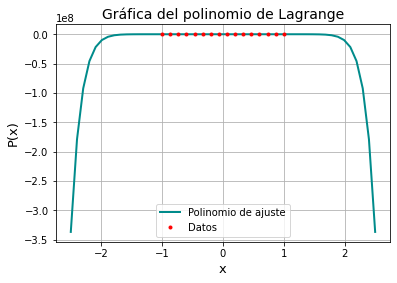

<Figure size 432x288 with 0 Axes>

In [2607]:
p(16)

Polinomio de ajuste para 20 puntos:
            19             18             17            16
-2.382e-10 x  - 2.567e+04 x  + 1.904e-08 x  + 9.56e+04 x 
              15             14             13            12
 - 1.645e-08 x  - 1.468e+05 x  + 5.449e-08 x  + 1.21e+05 x 
              11             10             9             8
 + 5.376e-08 x  - 5.858e+04 x  + 2.785e-08 x + 1.717e+04 x
              7        6             5         4             3
 + 2.783e-09 x - 3055 x + 9.253e-11 x + 327.7 x + 8.506e-13 x
          2
 - 21.62 x + 7.005e-15 x + 0.9927


<Figure size 432x288 with 0 Axes>

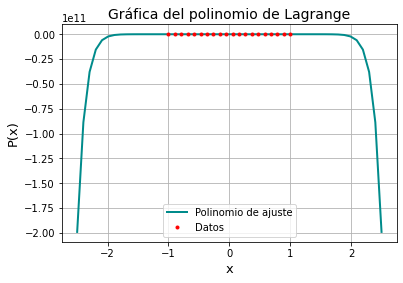

<Figure size 432x288 with 0 Axes>

In [2608]:
p(20)

*Cota del error*

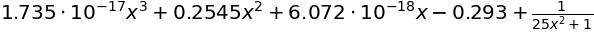

In [2609]:
import sympy as sp
from sympy import symbols
x = symbols('x')
epsilon=(1/(1+25*x**2))-(-1.735e-17*x**3 - 0.2545*x**2 - 6.072e-18*x + 0.293)
epsilon

In [2610]:
epsilon=(1/(1+25*0.5**2))-(-1.735e-17*0.5**3 - 0.2545*0.5**2 - 6.072e-18*0.5 + 0.293)
epsilon

Gráfica del error para 4 puntos con el polinomio de Lagrange


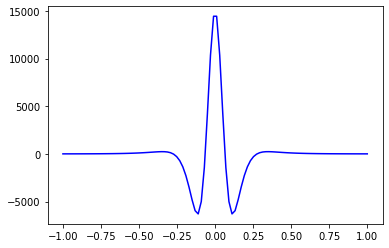

In [2611]:
f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
print('Gráfica del error para 4 puntos con el polinomio de Lagrange')
f5 = sp.diff(f_s(x),x, 4)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_), color='blue')
plt.show()


#3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Hermite, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 
 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5


In [2612]:
import numpy as np
from numpy.polynomial.hermite import hermfit

In [2613]:
def f(x):
  return 1/(1+25*x**2)

In [2614]:
def pH(n):
  Y_=[]
  X_=np.linspace(-1,1,n)

  for i in X_:
    Y_.append(f(i))

  coeficientes=np.polynomial.hermite.hermfit(X_, Y_, deg=n-1)
  PH=np.poly1d(coeficientes)

  x=np.linspace(-2.5,2.5,50)
  print(f'Polinomio de ajuste para {n} puntos:')
  print(PH)

  plt.plot(x,PH(x), color='lime', label='Polinomio de ajuste',linewidth=2)  
  plt.plot(X_,f(X_),'mX', label='Datos')
  plt.xlabel('x', fontsize=13)
  plt.ylabel('f(x)', fontsize=13)
  plt.title('Gráfica del polinomio de Hermite', fontsize=14)
  plt.legend()
  plt.grid()
  return plt.figure()

Polinomio de ajuste para 4 puntos:
        3            2
0.1657 x - 9.31e-18 x - 0.06363 x - 1.102e-18


<Figure size 432x288 with 0 Axes>

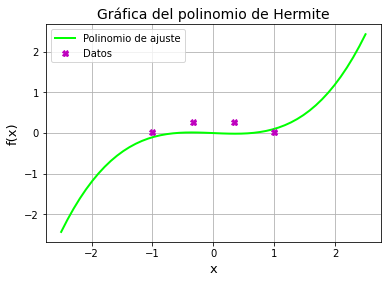

<Figure size 432x288 with 0 Axes>

In [2615]:
pH(4)

Polinomio de ajuste para 8 puntos:
        7             6         5             4         3            2
-4.449 x + 1.804e-12 x - 8.898 x + 1.067e-12 x - 1.858 x + 1.27e-13 x - 0.08084 x + 3.62e-15


<Figure size 432x288 with 0 Axes>

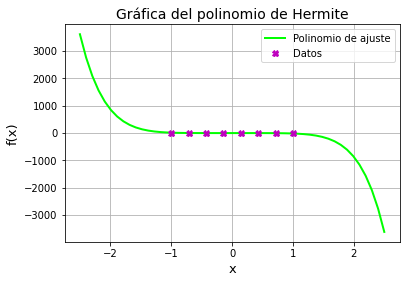

<Figure size 432x288 with 0 Axes>

In [2616]:
pH(8)

Polinomio de ajuste para 12 puntos:
       11             10        9             8        7             6
-1530 x  - 1.081e-07 x  - 4253 x - 1.047e-07 x - 1579 x - 2.434e-08 x
          5             4         3             2
 - 176.1 x - 2.019e-09 x - 7.026 x - 6.512e-11 x - 0.0874 x - 6.868e-13


<Figure size 432x288 with 0 Axes>

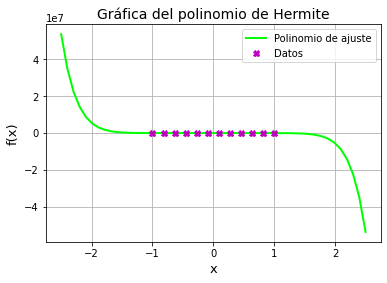

<Figure size 432x288 with 0 Axes>

In [2617]:
pH(12)

Polinomio de ajuste para 16 puntos:
            15         14             13         12             11
-9.925e+05 x  - 11.82 x  - 3.716e+06 x  - 14.59 x  - 1.988e+06 x 
          10             9          8             7           6
 - 4.635 x  - 3.548e+05 x - 0.5841 x - 2.714e+04 x - 0.03436 x
          5             4         3             2
 - 969.1 x - 0.0009924 x - 15.74 x - 1.347e-05 x - 0.0927 x - 6.796e-08


<Figure size 432x288 with 0 Axes>

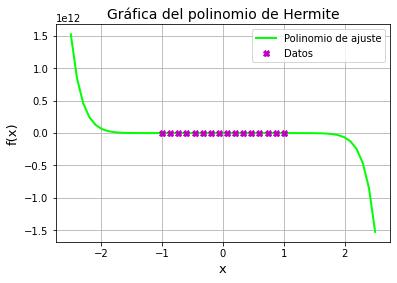

<Figure size 432x288 with 0 Axes>

In [2618]:
pH(16)

Polinomio de ajuste para 20 puntos:
            19             18             17             16
-1.109e+09 x  - 6.151e+06 x  - 5.239e+09 x  - 9.624e+06 x 
              15             14             13             12
 - 3.668e+09 x  - 4.016e+06 x  - 8.991e+08 x  - 6.982e+05 x 
              11            10             9        8             7
 - 1.012e+08 x  - 6.07e+04 x  - 5.907e+06 x - 2879 x - 1.881e+05 x
          6        5         4         3            2
 - 77.01 x - 3258 x - 1.148 x - 28.53 x - 0.008808 x - 0.09802 x - 2.688e-05


/usr/local/lib/python3.7/dist-packages/numpy/polynomial/hermite.py:1403: RankWarning: The fit may be poorly conditioned
  return pu._fit(hermvander, x, y, deg, rcond, full, w)


<Figure size 432x288 with 0 Axes>

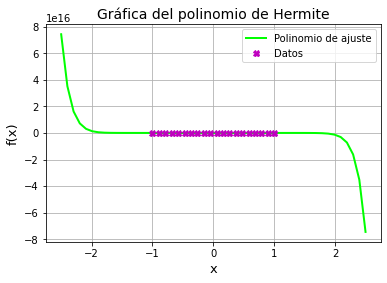

<Figure size 432x288 with 0 Axes>

In [2619]:
pH(20)

*Cota del error*

In [2620]:
#Para hallar la cota del error, de la función, se resta el polinomio interpolador de Hermite para 9 puntos. 

Polinomio de ajuste para 9 puntos:
     8             7         6             5         4             3
200 x - 6.957e-11 x + 458.2 x - 4.105e-11 x + 131.8 x - 4.863e-12 x
          2
 + 10.14 x - 1.377e-13 x + 0.2097


<Figure size 432x288 with 0 Axes>

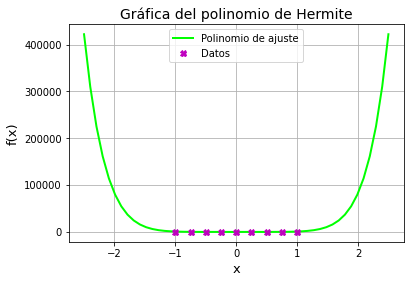

<Figure size 432x288 with 0 Axes>

In [2621]:
pH(9)

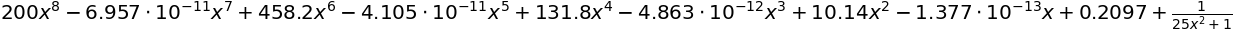

In [2622]:
import sympy as sp
from sympy import symbols
x = symbols('x')
epsilonH=(1/(1+25*x**2))+200*x**8-6.957e-11*x**7+458.2*x**6- 4.105e-11*x**5+ 131.8*x**4- 4.863e-12*x**3+ 10.14*x**2 - 1.377e-13*x + 0.2097
epsilonH

In [2623]:
epsilonH=(1/(1+25*0.5**2))-(+200*0.5**8-6.957e-11*0.5**7+458.2*0.5**6- 4.105e-11*0.5**5+ 131.8*0.5**4- 4.863e-12*0.5**3+ 10.14*0.5**2 - 1.377e-13*0.5 + 0.2097)
epsilonH

Gráfica del error para 4 puntos con el polinomio de Hermite


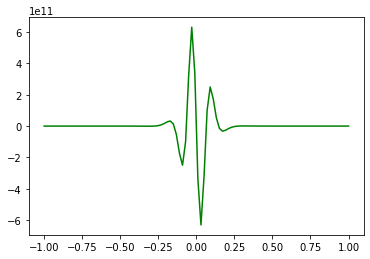

In [2624]:
f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica

print('Gráfica del error para 4 puntos con el polinomio de Hermite')
f5 = sp.diff(f_s(x),x, 9)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion

x_ = np.linspace(-1, 1, 100)

plt.figure()
plt.plot(x_, fxn5(x_), color='green' )
plt.show()

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/Metodos_Computacionales_taller/blob/main/Asignaciones/Tareas/Enunciados_2021_02/figuras/Fig.png?raw=true).

Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

Ref: Metodos numericos, Burden.

In [2625]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline

In [2626]:
x=np.array([73,84,101,106,120,131,156,170,177,186,213,241,268,301,338,358,367,378,395,406,414])
y=np.array([135,129,119,112,99,96,104,112,113,112,109,107,108,117,132,145,151,154,157,158,164])

In [2627]:
df=pd.DataFrame({"x":x, "y":y})
df

,x,y
0,73,135
1,84,129
2,101,119
3,106,112
4,120,99
5,131,96
6,156,104
7,170,112
8,177,113
9,186,112


**Interpolación con el método de lagrange.**

In [2628]:
P = lagrange(df.x, df.y)
print(P)

            20             19             18             17
-3.739e-39 x  + 1.819e-35 x  - 4.151e-32 x  + 5.909e-29 x 
              16             15             14             13
 - 5.881e-26 x  + 4.347e-23 x  - 2.475e-20 x  + 1.111e-17 x 
              12             11             10             9
 - 3.992e-15 x  + 1.159e-12 x  - 2.732e-10 x  + 5.234e-08 x
              8           7         6         5         4             3
 - 8.136e-06 x + 0.00102 x - 0.102 x + 8.022 x - 483.6 x + 2.154e+04 x
              2
 - 6.667e+05 x + 1.278e+07 x - 1.142e+08


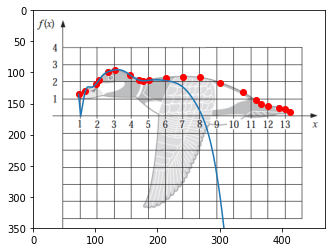

In [2629]:
im=plt.imread('Paloma.png')
plt.imshow(im)
plt.plot(df.x,df.y,'ro')
x=np.linspace(73,414,100)
plt.plot(x,P(x))
plt.xlim(0,470)
plt.ylim(350,0)


**Interpolación con splines cúbicos.**

In [2630]:
p=CubicSpline(df.x,df.y)

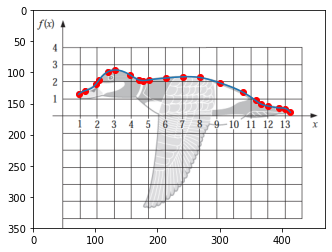

In [2631]:
im=plt.imread('Paloma.png')
plt.imshow(im)
plt.plot(df.x,df.y,'ro')
x=np.linspace(73,414,100)
plt.plot(x,p(x) )
plt.xlim(0,470)
plt.ylim(350,0)

Si el número de puntos a interpolar es muy alto, el grado del polinomio interpolador también será muy grande. Cuando se utiliza el método de Lagrange, el hecho de tener muchos puntos en vez de generar una mayor precisón en la función, genera una cantidad muy grande de oscilaciones entre puntos consecutivos. Es por esto que no se consigue un polinomio que aproxime el dibujo utilizando el polinomio de Lagrange. 